In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.signal import find_peaks

%load_ext autoreload
%autoreload 2

In [2]:
from integrals import *
from known_formulas import *

In [4]:
p = 3
Ts = np.linspace(0.63, 0.69, 10)

In [5]:
blend = 0.8
ms = np.linspace(0.001, 0.999, 5_000)
qs = np.empty((len(Ts), len(ms)))
hs = np.empty((len(Ts), len(ms)))
deltafs = np.empty((len(Ts), len(ms)))
fs = np.empty((len(Ts), len(ms)))

for jdx, T in enumerate(tqdm(Ts)):
    J0 = 1 / (2 * T)
    q_init = 0.8
    for idx, m in enumerate(ms):
        err = 1
        q = q_init
        while err > 1e-7:
            q_new = compute_q_standard(m, q, p, 1 / T, J0)

            err = abs(q_new - q)
            q = blend * q + (1 - blend) * q_new
            
        q_init = q

        qs[jdx, idx] = q
        fs[jdx, idx] = compute_free_energy_standard(m, q, p, 1 / T, J0)

  0%|          | 0/10 [00:00<?, ?it/s]

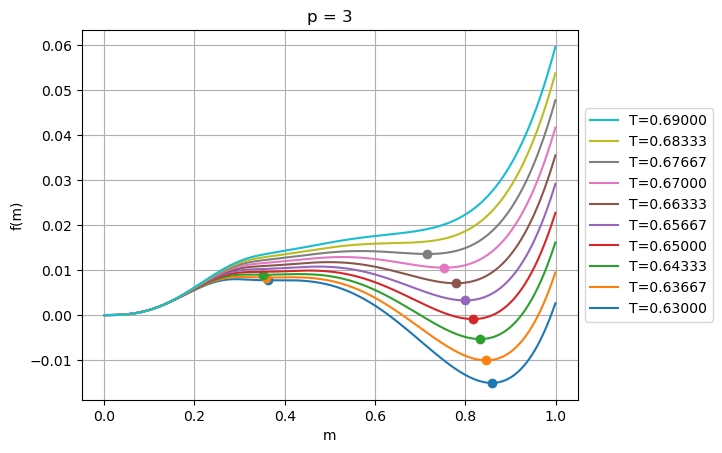

In [6]:
for idx, T in enumerate(Ts):
    plt.plot(ms, fs[idx, :] - fs[idx, 0], label=f"T={T:.5f}")
    peaks, _ = find_peaks(-(fs[idx, :] - fs[idx, 0]))
    plt.plot(
        ms[peaks],
        fs[idx, peaks] - fs[idx, 0],
        "o",
        color=plt.gca().lines[-1].get_color(),
    )

plt.title(f"p = {p:d}")
plt.xlabel("m")
plt.grid()
plt.ylabel("f(m)")

handles, labels = plt.gca().get_legend_handles_labels()
order = np.argsort(-fs[:, -1])
plt.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
#plt.xlim(0.78,0.85)
#plt.ylim(-0.000005, 0.000005)

In [12]:
Ts

array([0.65138   , 0.65138111, 0.65138222, 0.65138333, 0.65138444,
       0.65138556, 0.65138667, 0.65138778, 0.65138889, 0.65139   ])